In [1]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
from sklearn  import preprocessing

In [2]:
df= pd.read_csv(r"E:/HOUSEPREDICTION/Bengaluru_House_Data.csv")
df.head(4)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00


In [3]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df=df.drop(["society","area_type","balcony","availability"],axis="columns")

In [6]:
df.iloc[:3]

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


In [7]:
df.shape

(13320, 5)

In [8]:
df.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

# EXPLORATORY DATA ANALYSIS

In [9]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
b = pd.isnull(df["location"]) 

In [11]:
df[b]

,location,size,total_sqft,bath,price
568,NaN,3 BHK,1600,3.0,86.0


In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df.shape

(13246, 5)

In [15]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df["bhk"]=df["size"].apply(lambda x: int(x.split(' ')[0]))

In [17]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
df=df.drop(columns=["size"])

In [19]:
df["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df[df["bhk"]>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [21]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
df.dtypes

location       object
total_sqft     object
bath          float64
price         float64
bhk             int64
dtype: object

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [24]:
df[~df["total_sqft"].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [25]:
def convert_sqft_to_num(x):
    tokens= x.split('-')
    if len(tokens)== 2:
        return (float(tokens[0])+ float (tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [26]:
convert_sqft_to_num("2100-2850")

2475.0

In [27]:
df1=df.copy()

In [28]:
df1["total_sqft"]=df1["total_sqft"].apply(convert_sqft_to_num)
df1.head(2)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4


In [29]:
df1.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [30]:
df1.loc[410]

location      Kengeri
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [31]:
df1.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [32]:
df1=df1.dropna()

In [33]:
df1.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [34]:
df1["price_per_sqft"]= df1["price"]*100000/df1["total_sqft"]

In [35]:
df1.head(3)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556


In [36]:
len(df1["location"].unique())

1298

# OTHER CATEGORY

In [37]:
df1.location= df1.location.apply(lambda x: x.strip())

In [38]:
location_status= df1.groupby("location")['location'].agg("count").sort_values(ascending=False)
location_status

location
whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
Kanakapura Main Road       1
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
whitefiled                 1
Name: location, Length: 1286, dtype: int64

In [39]:
len(location_status[location_status<=10])

1046

In [40]:
location_status_lessthan_10=location_status[location_status<=10]

In [41]:
location_status_lessthan_10

location
Dodsworth Layout         10
Sadashiva Nagar          10
Gunjur Palya             10
Sector 1 HSR Layout      10
Basapura                 10
                         ..
Kanakapura Main Road      1
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
whitefiled                1
Name: location, Length: 1046, dtype: int64

In [42]:
len(df1.location.unique())

1286

In [43]:
df1.location= df.location.apply(lambda x: "other" if x in location_status_lessthan_10 else x)

In [44]:
len(df1.location.unique())

282

In [45]:
df1.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


# OUTLIER DETECTION

In [46]:
df1

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [47]:
df1[df1.total_sqft/df1.bhk <300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [48]:
df1=df1[~(df1.total_sqft/df1.bhk <300)]

In [49]:
df1

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [50]:
df1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [51]:
def remove_outliers(df):
    df_out= pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out= pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
        

In [52]:
df1 = remove_outliers(df1)
df1.shape

(10202, 6)

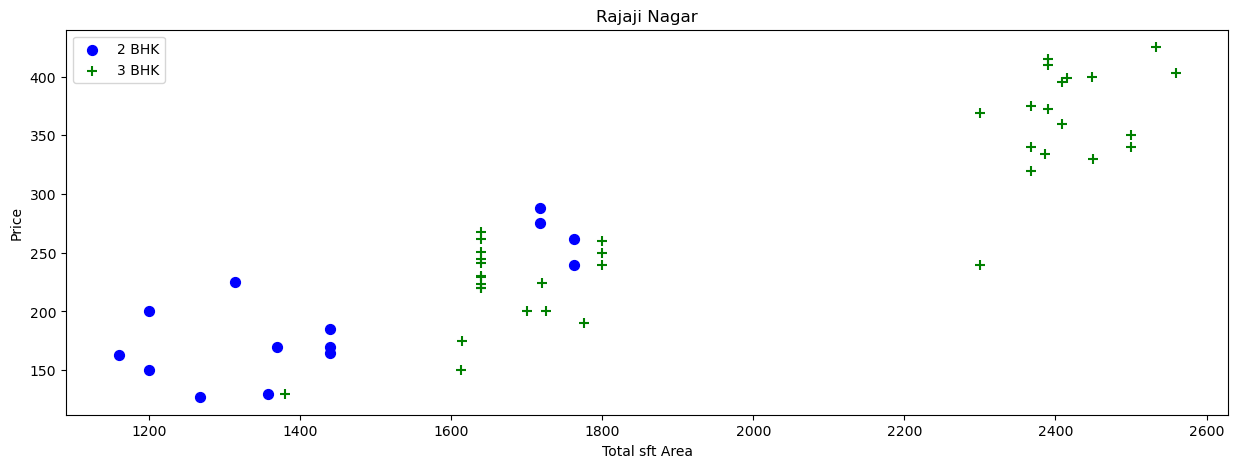

In [53]:
def plot_scatter_chart(df,location):
    bhk2= df[(df.location==location) & (df.bhk==2)]
    bhk3= df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"]=(15,5)
    plt.scatter(bhk2.total_sqft, bhk2.price ,color="blue",label="2 BHK",s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price ,marker="+", color="green",label="3 BHK",s=50)
    plt.xlabel("Total sft Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df1,"Rajaji Nagar")

Now we can remove those 2BHK Apartments whose price_sqft is less than the mean value of 1 Apartment's price_sft

In [54]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [55]:
df1 = remove_bhk_outliers(df1)

In [56]:
df1.shape

(7312, 6)

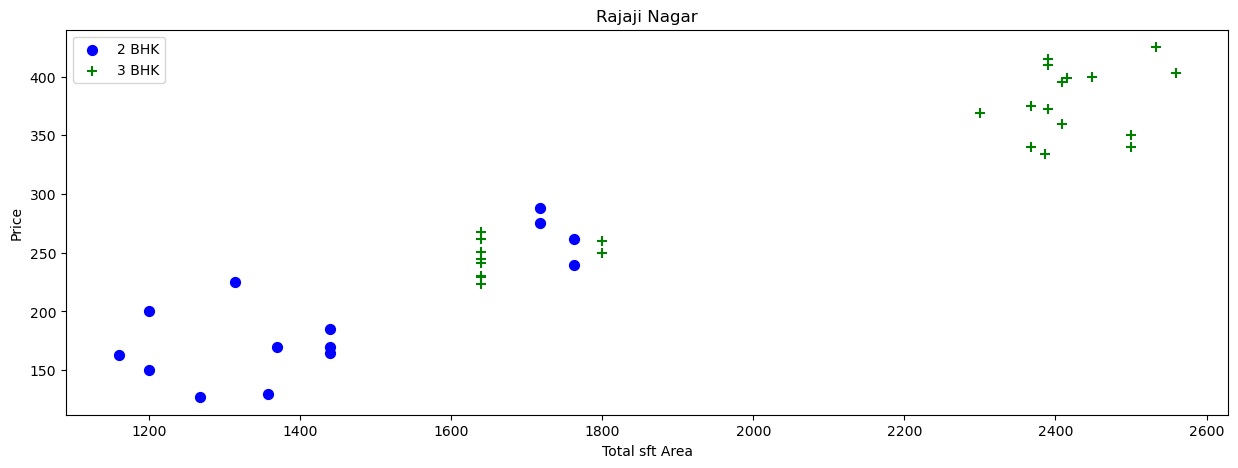

In [57]:
plot_scatter_chart(df1,"Rajaji Nagar")

Text(0, 0.5, 'Count')

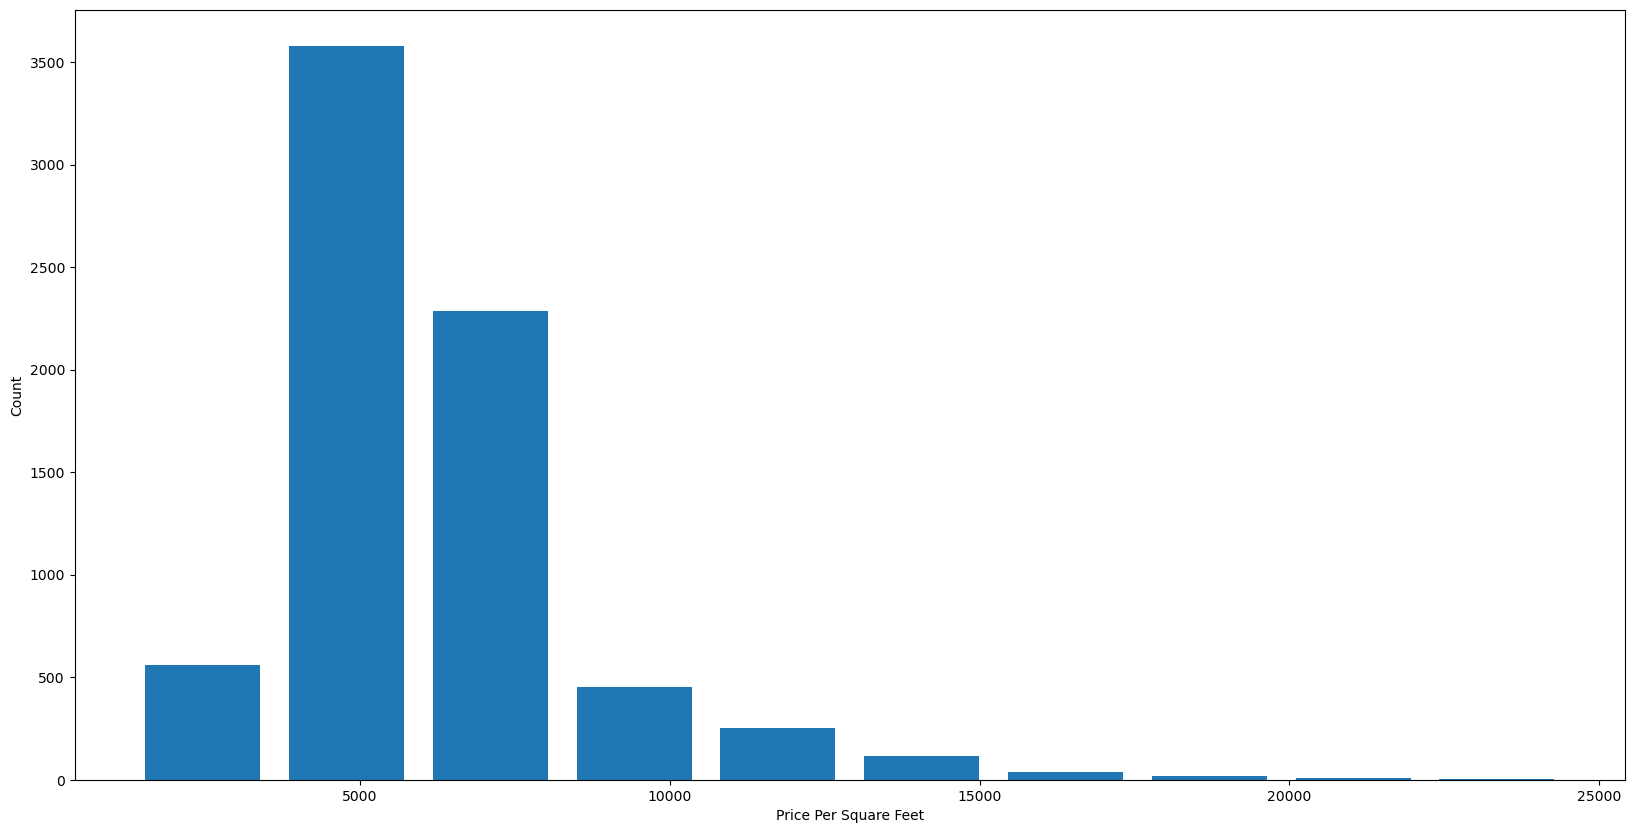

In [58]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df1.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [59]:
df1.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

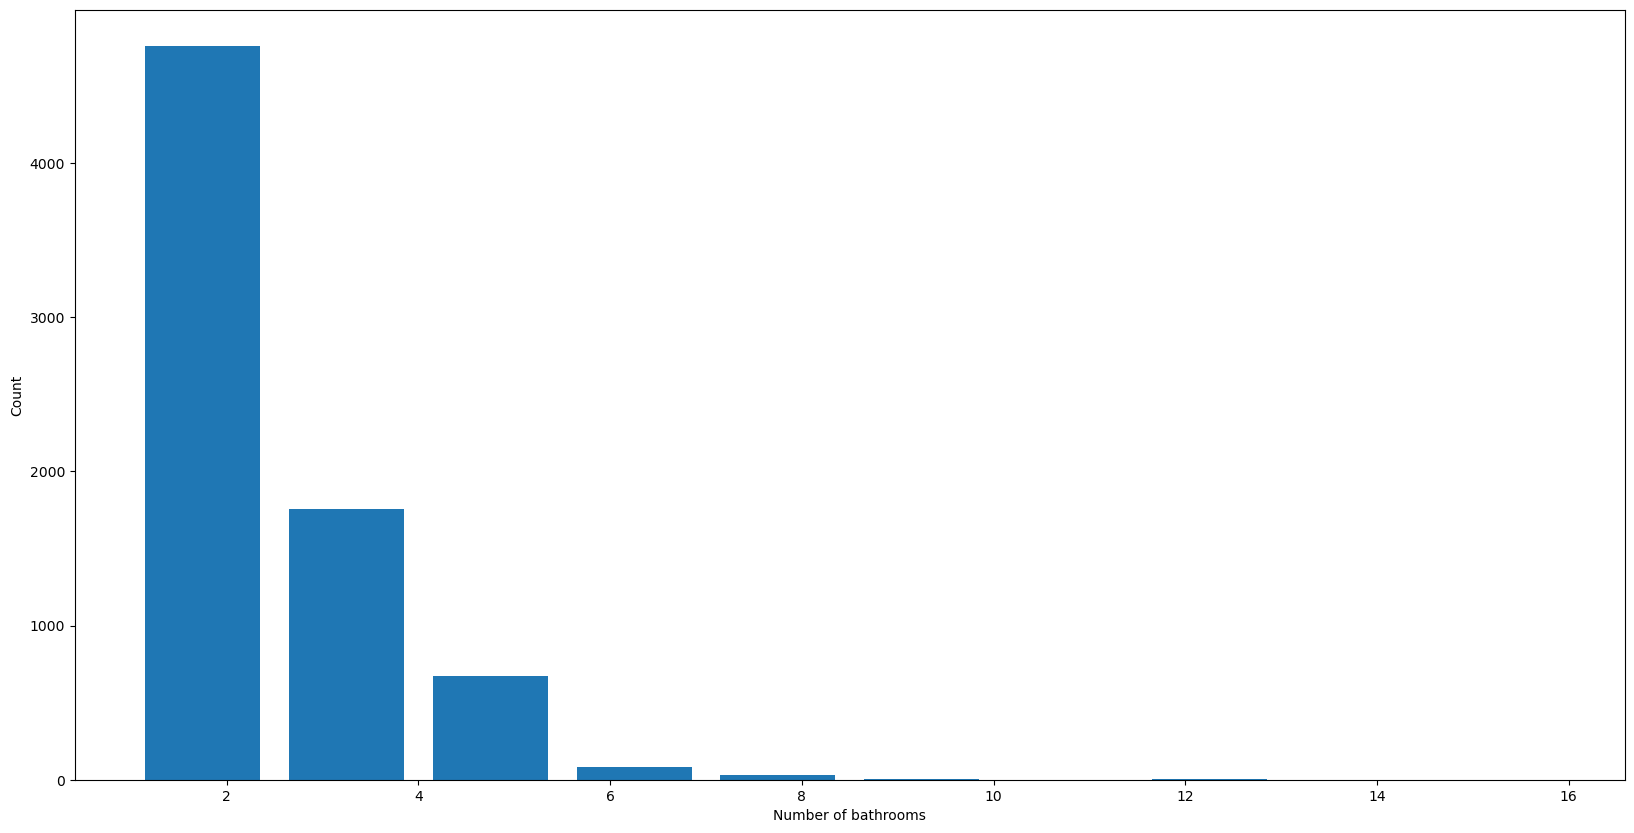

In [60]:
plt.hist(df1.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [61]:
df1[df1.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5292,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8015,other,12000.0,12.0,525.0,10,4375.000000
8101,other,10000.0,16.0,550.0,16,5500.000000
8815,other,6000.0,12.0,150.0,11,2500.000000
9137,other,5425.0,13.0,275.0,13,5069.124424


In [62]:
df1[df1.bath>df1.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1646,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5253,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6733,Thanisandra,1806.0,6.0,116.0,3,6423.034330
7945,other,11338.0,9.0,1000.0,6,8819.897689


In [63]:
df1 = df1[df1.bath<df1.bhk+2]
df1.shape

(7234, 6)

In [64]:
df1.head(4)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Devarabeesana Halli,1672.0,3.0,150.0,3,8971.291866
1,Devarabeesana Halli,1750.0,3.0,149.0,3,8514.285714
2,Devarabeesana Halli,1750.0,3.0,150.0,3,8571.428571
4,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000


In [65]:
df1 = df1.drop(['price_per_sqft'],axis='columns')
df1.head(3)

,location,total_sqft,bath,price,bhk
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3


# ONE HOT ENCODING

In [66]:
dummies=pd.get_dummies(df1.location)

In [67]:
dummies.head(3)

,Devarabeesana Halli,Devarachikkanahalli,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,whitefield,whitefield
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df2=pd.concat([df1,dummies.drop("other",axis="columns")],axis="columns")

In [69]:
df2.head(2)

,location,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Mysore Highway,Rachenahalli,Thanisandra,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,whitefield,whitefield
0,Devarabeesana Halli,1672.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarabeesana Halli,1750.0,3.0,149.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df3=df2.drop("location",axis="columns")

In [71]:
df3.head()

,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Mysore Highway,Rachenahalli,Thanisandra,south,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,whitefield,whitefield
0,1672.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,40.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,83.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df3.shape

(7234, 261)

In [73]:
x=df3.drop(columns=["price"])

In [74]:
x.head()

,total_sqft,bath,bhk,Devarabeesana Halli,Devarachikkanahalli,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block Jayanagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,whitefield,whitefield
0,1672.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
x.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarabeesana Halli',
       ' Devarachikkanahalli', ' Mysore Highway', ' Rachenahalli',
       ' Thanisandra', ' south', '1st Block Jayanagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'whitefield', 'whitefield '],
      dtype='object', length=260)

In [76]:
y=df3.price

In [77]:
y.head(2)

0    150.0
1    149.0
Name: price, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.20,random_state=0)

In [79]:
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test,y_test)

0.7941735527243917

# Use K Fold cross validation to measure accuracy of our LinearRegression model


from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=600)

cross_val_score(LinearRegression(), x, y, cv=cv)

# Find best model using GridSearchCV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
             },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

In [80]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.6756020017589401

In [81]:
from sklearn.linear_model import Lasso
lassomodel= Lasso()
lassomodel.fit(x_train,y_train)
lassomodel.score(x_test,y_test)

0.6795767700615707

In [82]:
x.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarabeesana Halli',
       ' Devarachikkanahalli', ' Mysore Highway', ' Rachenahalli',
       ' Thanisandra', ' south', '1st Block Jayanagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'whitefield', 'whitefield '],
      dtype='object', length=260)

In [83]:
np.where(x.columns=="1st Block Jayanagar")[0][0]

9

In [86]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    
    if loc_index >= 0:
        X[loc_index] = 1

    return lr_clf.predict([X])[0]

In [112]:
predict_price('Indira Nagar',1000, 2, 2)

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


198.741072948595

# Export the tested model to a pickle file

In [114]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [116]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))